# Titanic - Survival Prediction 

### Importing important libraries and modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import numpy as np

## Reading of test and train data 

In [2]:
df_train = pd.read_csv('train (2).csv')
df_test = pd.read_csv('test.csv')

### Data Insight :



In [902]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df_test.shape

(418, 11)

In test data : <br>
Number of rows = 418 <br>
Number of columns = 11 

In [6]:
print(df_train.shape)

(891, 12)


In train data : <br>
Number of rows = 891 <br>
Number of columns = 12

In [7]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Tells us about the datatype of the features in the data set

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here , we can see the missing in repective columns 

### Data Visualisation :

In [907]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe the numerical data . Telling us the some of the statiscal stuff . <br>
We can learn the different things from the table given .<br>


In [10]:
#Here , we replace all null values in Age column by it's median od Age 'cause' This is most suitable
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_train['Died'] = 1 -  df_train['Survived']

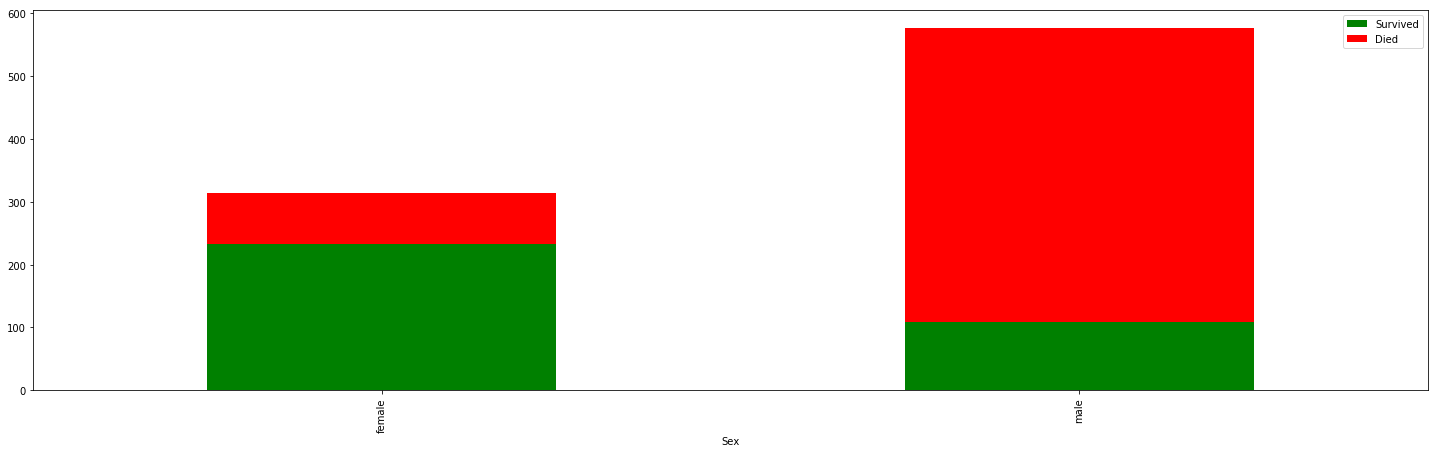

In [13]:
df_train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, color=['g', 'r']);

#### Let's combine , test and train data and Clean data's altogether .

In [19]:
train = df_train.copy()
test = df_test.copy()

In [20]:
#  This function combine the test and train 
def get_combined_data():
    target = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace = True)
    combined.drop(['PassengerId', 'index'], inplace=True, axis=1)
    return combined

In [21]:
combined = get_combined_data()

In [22]:
print(combined.shape)

(1309, 11)


In [23]:
combined.head(2)

,Age,Cabin,Died,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
0,22.0,NaN,1.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,A/5 21171
1,38.0,C85,0.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,PC 17599


##  Feature Enggineering :
### working on titles

In [24]:
#working on titles
titles = set()
for name in df_train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [25]:
print (titles)

{'Sir', 'Mlle', 'Mme', 'Col', 'Mrs', 'Jonkheer', 'Mr', 'Master', 'Rev', 'Lady', 'Miss', 'Capt', 'Ms', 'Dr', 'the Countess', 'Don', 'Major'}


In [26]:
titles = set()
for name in df_train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [27]:
print (titles)

{'Sir', 'Mlle', 'Mme', 'Col', 'Mrs', 'Jonkheer', 'Mr', 'Master', 'Rev', 'Lady', 'Miss', 'Capt', 'Ms', 'Dr', 'the Countess', 'Don', 'Major'}


In [28]:
title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
def get_titles():
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    combined['Title'] = combined.Title.map(title_Dictionary)
    #status('Title')
    return combined

In [29]:
combined = get_titles()

In [30]:
combined.head(3)

,Age,Cabin,Died,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket,Title
0,22.0,NaN,1.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,A/5 21171,Mr
1,38.0,C85,0.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,PC 17599,Mrs
2,26.0,NaN,0.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,STON/O2. 3101282,Miss


In [31]:
#Working on other feature
grouped_train = combined.iloc[:891].groupby(['Sex', 'Pclass', 'Title'])
grouped_train_median = grouped_train.median()
grouped_train_median = grouped_train_median.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [32]:
grouped_train_median

,Sex,Pclass,Title,Age
0,female,1,Miss,29.5
1,female,1,Mrs,38.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,22.0
7,female,3,Mrs,29.0
8,male,1,Master,4.0
9,male,1,Mr,36.0


In [33]:
def fill_age(row):
    condition = (
        (grouped_train_median['Sex'] == row['Sex']) & 
        (grouped_train_median['Title'] == row['Title']) & 
        (grouped_train_median['Pclass'] == row['Pclass'])
    ) 
    return grouped_train_median[condition]['Age'].values[0]
def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    #status('age')
    return combined

In [34]:
combined = process_age()

In [35]:
combined.isnull().sum()

Age            0
Cabin       1014
Died         418
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Ticket         0
Title          1
dtype: int64

In [36]:
#The number of missing values is pretty close to total data , here we will drop it .
combined.drop('Name', axis=1, inplace=True)

In [37]:
titles_dummies = pd.get_dummies(combined['Title'] , prefix='Title')
combined = pd.concat([combined , titles_dummies], axis=1)
combined.drop('Title', axis=1, inplace=True)

In [38]:
combined.tail(3)

,Age,Cabin,Died,Embarked,Fare,Parch,Pclass,Sex,SibSp,Ticket,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
1306,38.5,NaN,NaN,S,7.2500,0,3,male,0,SOTON/O.Q. 3101262,0,0,1,0,0,0
1307,28.0,NaN,NaN,S,8.0500,0,3,male,0,359309,0,0,1,0,0,0
1308,6.5,NaN,NaN,C,22.3583,1,3,male,1,2668,1,0,0,0,0,0


### Processing Embarked

In [932]:
combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)

In [933]:
combined.iloc[:891].Embarked.mode()

0    S
dtype: object

In [934]:
combined.Embarked.fillna('S', inplace=True)

In [935]:
embarked_dummies = pd.get_dummies(combined['Embarked'], prefix = 'Embarked')
combined = pd.concat([combined, embarked_dummies], axis=1)
combined.drop('Embarked', axis=1, inplace=True)

In [936]:
combined.head(5)

,Age,Cabin,Died,Fare,Parch,Pclass,Sex,SibSp,Ticket,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,1.0,7.2500,0,3,male,1,A/5 21171,0,0,1,0,0,0,0,0,1
1,38.0,C85,0.0,71.2833,0,1,female,1,PC 17599,0,0,0,1,0,0,1,0,0
2,26.0,NaN,0.0,7.9250,0,3,female,0,STON/O2. 3101282,0,1,0,0,0,0,0,0,1
3,35.0,C123,0.0,53.1000,0,1,female,1,113803,0,0,0,1,0,0,0,0,1
4,35.0,NaN,1.0,8.0500,0,3,male,0,373450,0,0,1,0,0,0,0,0,1


In [937]:
combined.isnull().sum()

Age                 0
Cabin            1014
Died              418
Fare                0
Parch               0
Pclass              0
Sex                 0
SibSp               0
Ticket              0
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Officer       0
Title_Royalty       0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
dtype: int64

In [938]:
combined.drop('Died', axis=1, inplace=True)

### Processing Cabin 

In [939]:
train_cabin, test_cabin = set(), set()
for c in combined[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
for c in combined[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [940]:
print(train_cabin , test_cabin)

{'A', 'U', 'F', 'D', 'B', 'T', 'G', 'E', 'C'} {'A', 'U', 'F', 'D', 'B', 'E', 'C', 'G'}


In [941]:
combined.Cabin.fillna('U', inplace=True)

In [942]:
combined.Cabin.isnull().sum()

0

In [943]:
combined.head()

,Age,Cabin,Fare,Parch,Pclass,Sex,SibSp,Ticket,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,22.0,U,7.2500,0,3,male,1,A/5 21171,0,0,1,0,0,0,0,0,1
1,38.0,C85,71.2833,0,1,female,1,PC 17599,0,0,0,1,0,0,1,0,0
2,26.0,U,7.9250,0,3,female,0,STON/O2. 3101282,0,1,0,0,0,0,0,0,1
3,35.0,C123,53.1000,0,1,female,1,113803,0,0,0,1,0,0,0,0,1
4,35.0,U,8.0500,0,3,male,0,373450,0,0,1,0,0,0,0,0,1


In [944]:
#combined['cabin'] = combined['Cabin'].map(lambda c : c[0])
#cabin_dummies = pd.get_dummies(combined['Cabin'], prefix = 'Cabin')
#combined = pd.concat([combined, cabin_dummies], axis=1)
#combined.drop('Cabin', axis=1, inplace=True)

In [945]:
combined.head()

,Age,Cabin,Fare,Parch,Pclass,Sex,SibSp,Ticket,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,22.0,U,7.2500,0,3,male,1,A/5 21171,0,0,1,0,0,0,0,0,1
1,38.0,C85,71.2833,0,1,female,1,PC 17599,0,0,0,1,0,0,1,0,0
2,26.0,U,7.9250,0,3,female,0,STON/O2. 3101282,0,1,0,0,0,0,0,0,1
3,35.0,C123,53.1000,0,1,female,1,113803,0,0,0,1,0,0,0,0,1
4,35.0,U,8.0500,0,3,male,0,373450,0,0,1,0,0,0,0,0,1


In [946]:
combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])

In [947]:
combined.head(15)

,Age,Cabin,Fare,Parch,Pclass,Sex,SibSp,Ticket,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,22.0,U,7.2500,0,3,male,1,A/5 21171,0,0,1,0,0,0,0,0,1
1,38.0,C,71.2833,0,1,female,1,PC 17599,0,0,0,1,0,0,1,0,0
2,26.0,U,7.9250,0,3,female,0,STON/O2. 3101282,0,1,0,0,0,0,0,0,1
3,35.0,C,53.1000,0,1,female,1,113803,0,0,0,1,0,0,0,0,1
4,35.0,U,8.0500,0,3,male,0,373450,0,0,1,0,0,0,0,0,1
5,28.0,U,8.4583,0,3,male,0,330877,0,0,1,0,0,0,0,1,0
6,54.0,E,51.8625,0,1,male,0,17463,0,0,1,0,0,0,0,0,1
7,2.0,U,21.0750,1,3,male,3,349909,1,0,0,0,0,0,0,0,1
8,27.0,U,11.1333,2,3,female,0,347742,0,0,0,1,0,0,0,0,1
9,14.0,U,30.0708,0,2,female,1,237736,0,0,0,1,0,0,1,0,0


In [948]:
cabin_dummies = pd.get_dummies(combined['Cabin'], prefix = 'Cabin')
combined = pd.concat([combined, cabin_dummies], axis=1)
combined.drop('Cabin', axis=1, inplace=True)

In [949]:
combined.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Ticket,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.0,7.2500,0,3,male,1,A/5 21171,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,0,1,female,1,PC 17599,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,7.9250,0,3,female,0,STON/O2. 3101282,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,0,1,female,1,113803,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,35.0,8.0500,0,3,male,0,373450,0,0,1,...,1,0,0,0,0,0,0,0,0,1


## Processing sex

In [950]:
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})

In [951]:
combined.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Ticket,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.0,7.2500,0,3,1,1,A/5 21171,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,0,1,0,1,PC 17599,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,7.9250,0,3,0,0,STON/O2. 3101282,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,0,1,0,1,113803,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,35.0,8.0500,0,3,1,0,373450,0,0,1,...,1,0,0,0,0,0,0,0,0,1


## Processing Pclass

In [952]:
pclass_dummies = pd.get_dummies(combined['Pclass'], prefix ='Pclass')
combined = pd.concat([combined, pclass_dummies], axis=1)
combined.drop('Pclass', axis = 1, inplace=True)

In [953]:
combined.drop('Ticket', axis = 1, inplace=True)

In [954]:
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] +1
combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

In [955]:
combined.head()

,Age,Fare,Parch,Sex,SibSp,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,22.0,7.2500,0,1,1,0,0,1,0,0,...,0,0,1,0,0,1,2,0,1,0
1,38.0,71.2833,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,2,0,1,0
2,26.0,7.9250,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,1,0,0
3,35.0,53.1000,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,2,0,1,0
4,35.0,8.0500,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,1,0,0


In [956]:
combined.columns

Index(['Age', 'Fare', 'Parch', 'Sex', 'SibSp', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'FamilySize', 'Singleton', 'SmallFamily',
       'LargeFamily'],
      dtype='object')

# Modeling

In [957]:
from sklearn.linear_model import LogisticRegression

In [958]:
#recover train , test and target
target = pd.read_csv('train (2).csv')['Survived'].values
train = combined[:891]
test = combined[891:]

In [959]:
logreg = LogisticRegression()
logreg.fit(train , target)
logreg.score(train, target)

0.8406285072951739

In [960]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, target)

In [961]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

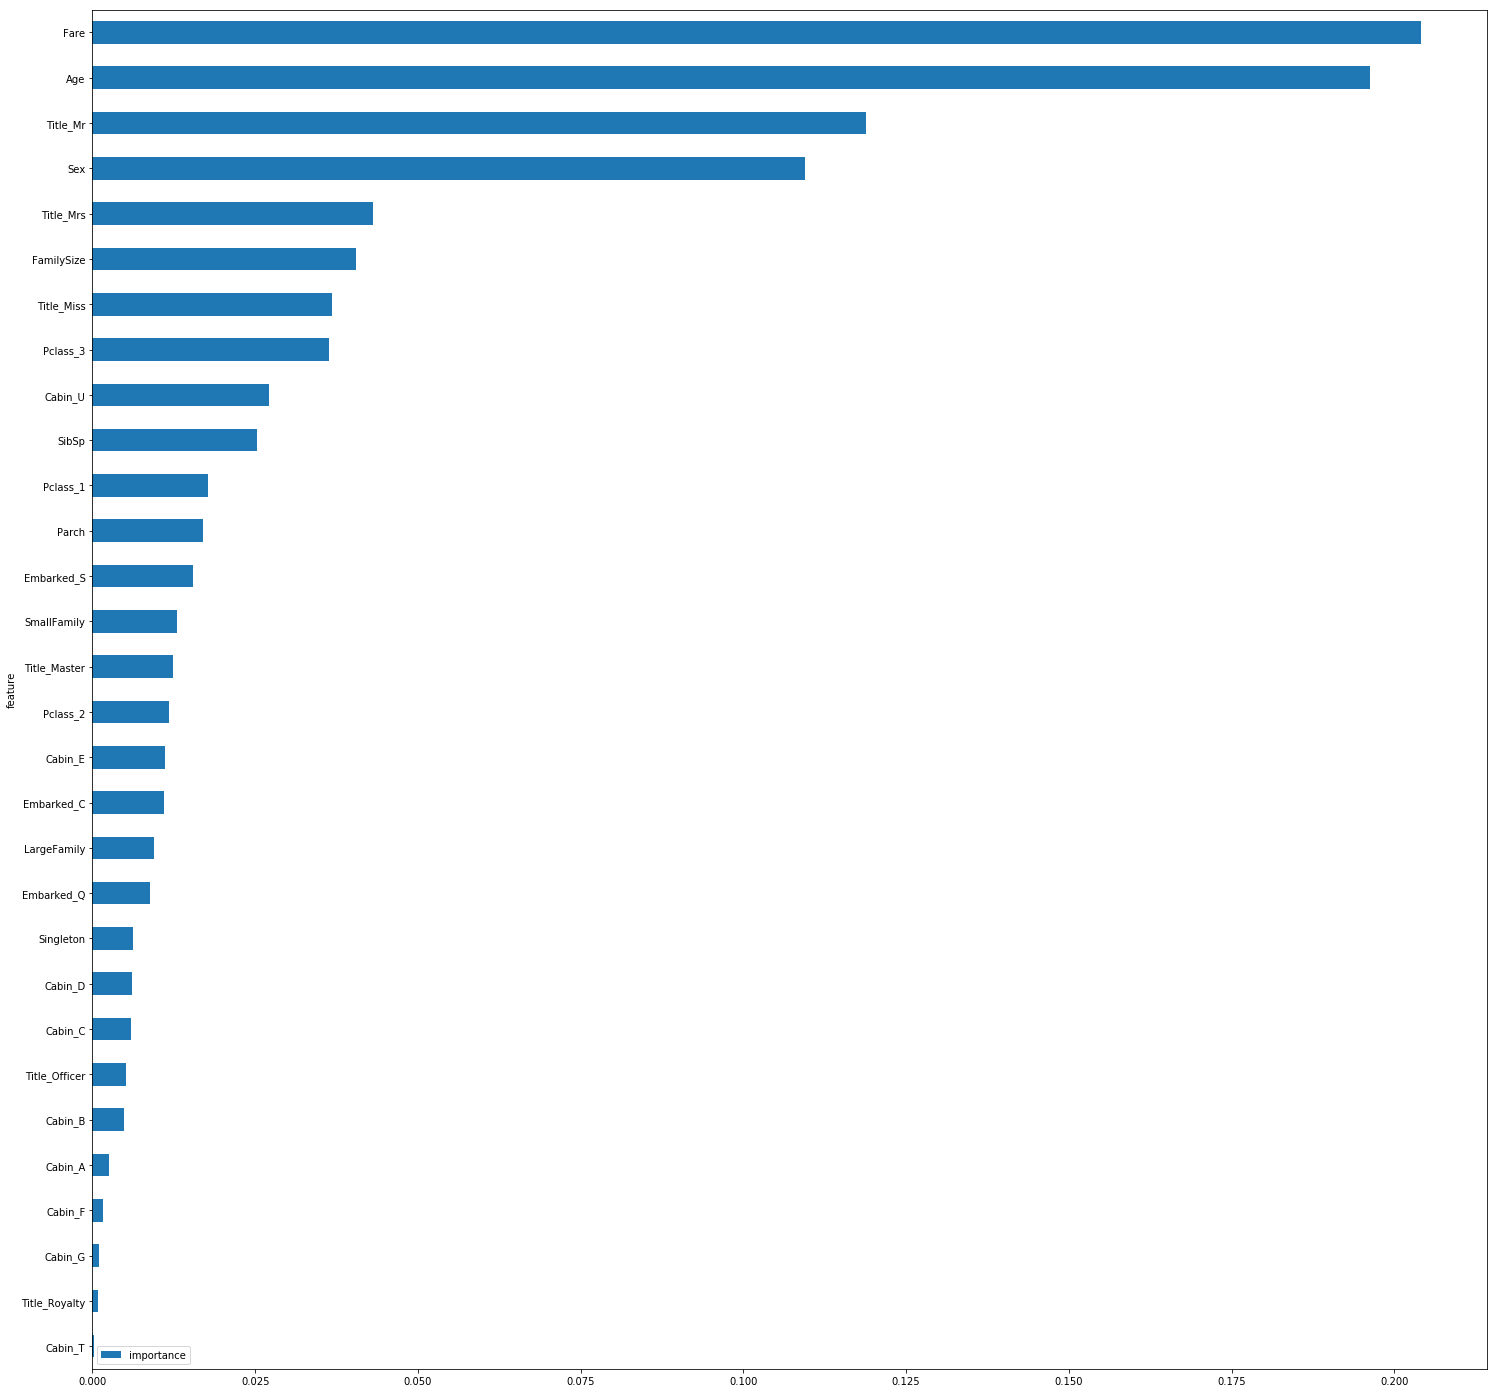

In [962]:
features.plot(kind='barh', figsize=(25, 25))

In [963]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print (train_reduced.shape)

(891, 8)


In [964]:
test_reduced = model.transform(test)
print (test_reduced.shape)

(418, 8)


In [965]:
logreg.fit(train_reduced , target)
logreg.score(train_reduced, target)

0.813692480359147

In [968]:
predictions = logreg.predict(test_reduced)

In [985]:
result = pd.DataFrame(test.index+1, columns=['PassengerId'])

In [986]:
result['Survived'] = predictions

In [987]:
result.shape

(418, 2)

In [988]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [989]:
type(result)

pandas.core.frame.DataFrame

In [990]:
result.to_csv('survived.csv', index=False)

In [991]:
type(result)

pandas.core.frame.DataFrame

In [992]:
tell = pd.read_csv('survived.csv')

In [993]:
tell.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [994]:
tell.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
